In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas

data = pd.read_csv("Resources/TLT.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-25,131.479996,132.559998,131.320007,131.679993,117.632149,6097200
1,2016-02-26,130.309998,130.809998,130.039993,130.410004,116.497665,9245000
2,2016-02-29,130.470001,131.169998,130.419998,130.979996,117.006889,8016100
3,2016-03-01,130.820007,130.850006,128.320007,128.429993,114.946518,13729100
4,2016-03-02,128.320007,128.970001,128.210007,128.960007,115.420937,7047700


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,133.749134,134.287387,133.208173,133.742891,127.441990,9.429966e+06
std,15.770969,15.953290,15.554081,15.723085,18.367754,4.984150e+06
min,112.480003,112.709999,111.900002,112.000000,106.384346,2.963800e+06
25%,121.340000,121.675003,120.864998,121.254998,114.060566,6.382600e+06
50%,127.760002,128.089996,127.339996,127.760002,118.229538,8.380100e+06
75%,141.394996,141.889999,140.720002,141.465004,137.982559,1.097980e+07
max,179.100006,179.699997,170.779999,171.570007,170.465576,7.628830e+07


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2016-02-25,131.679993
1,2016-02-26,130.410004
2,2016-02-29,130.979996
3,2016-03-01,128.429993
4,2016-03-02,128.960007


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

Importing plotly failed. Interactive plots will not work.


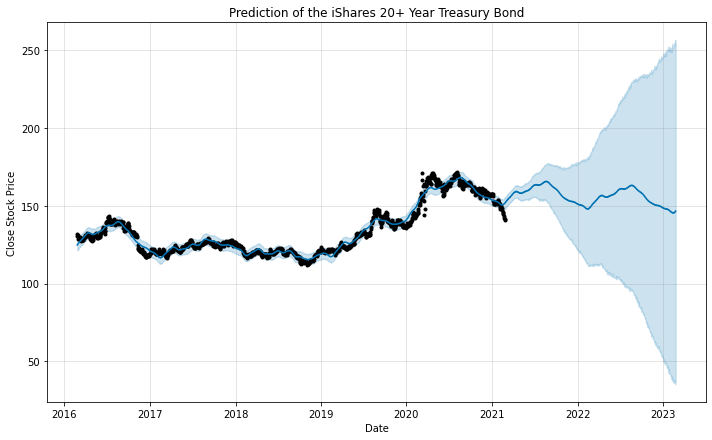

In [7]:
future = m.make_future_dataframe(periods=730) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the iShares 20+ Year Treasury Bond")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()